In [3]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

def cv_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def plt_show(image, name=''):
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # 获取图像的原始尺寸
    height, width, _ = img_rgb.shape
    # 设置图像的显示尺寸（以像素为单位）
    dpi = 100  # 图像的分辨率（点每英寸）
    figsize = width / float(dpi), height / float(dpi)
    # 创建一个具有指定尺寸的图形
    plt.figure(figsize=figsize)
    plt.imshow(img_rgb)
    title = name
    plt.title(title)
    # 清除坐标轴刻度
    plt.xticks([]) 
    plt.yticks([]) 
    plt.xlabel(f'figsize:{figsize}inch', fontsize=12, labelpad=15)
    plt.show()

### Sobel算子：cv2.Sobel()

Sobel算子是一种用于图像处理的算子，主要用于边缘检测任务。</br>它通过计算图像亮度的空间梯度来突出显示图像中的边缘。</br>Sobel算子由两个核（卷积矩阵）组成（水平边缘核Gx、垂直边缘核Gy），分别用于检测图像的水平边缘和垂直边缘。

<img src='assets/sobel_1.png' />

函数 cv2.Sobel() 是 OpenCV 库中的一个函数，用于计算图像的索贝尔梯度。该函数在图像处理中常用于边缘检测。

##### cv2.Sobel(src, ddepth, dx, dy, ksize=None, scale=None, delta=None, borderType=None)

参数：</br>
- src：输入图像，必须是灰度图像（单通道）。
- ddepth：目标图像的所需深度，可以使用 -1 表示与源图像相同的深度。
- dx：x方向上的导数阶数。
- dy：y方向上的导数阶数。
- ksize：索贝尔核的大小，必须是正数和奇数。默认值为 3。
- scale：可选参数，用于计算梯度时对结果进行缩放的比例因子，默认值为 1。
- delta：可选参数，在结果存入目标图像之前添加到结果中的可选值，默认值为 0。
- borderType：边界模式，用于处理图像边界之外的点。

返回值：</br>
- 函数返回计算得到的导数图像，即梯度图像。

注意事项：</br>
- ddepth 参数非常重要，尤其是在使用 dx 或 dy 不为 0 的情况下。由于Sobel运算涉及到图像像素值的加减运算，可能会导致结果超出标准8位图像的像素值范围（0-255）。因此，通常使用 cv2.CV_64F 或 cv2.CV_32F 来确保在计算过程中不会发生溢出。
- 使用 ksize=3 时，函数将使用 3x3 的核进行卷积运算，这是默认值。如果需要更精细的边缘检测，可以使用更大的核（如 ksize=5）。
- 为了得到更好的边缘检测效果，通常会在应用Sobel算子之前对图像进行高斯模糊处理以减少噪声。

CV_64F 表示每个像素值是一个 64 位浮点数（double），CV_32F 表示每个像素值是一个 32 位浮点数（float）</br>
为什么使用浮点数</br>
在图像处理中，特别是在进行如边缘检测、图像滤波、图像配准等计算时，像素值可能会超出标准的 8 位无符号整数（0-255）范围。使用浮点数可以避免在计算过程中发生溢出，并且能够保持更精确的计算结果。

##### 示例1：实心圆

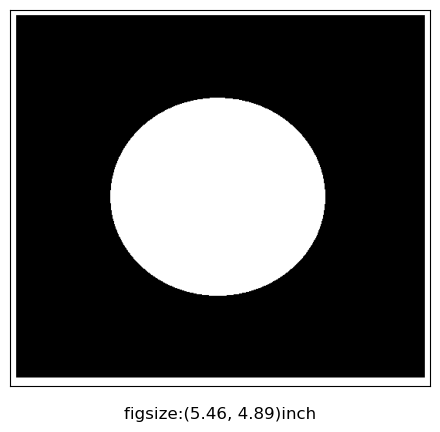

(489, 546)

In [9]:
img = cv2.imread('assets/pie.png', cv2.IMREAD_GRAYSCALE)
# cv_show('', img)
plt_show(img)

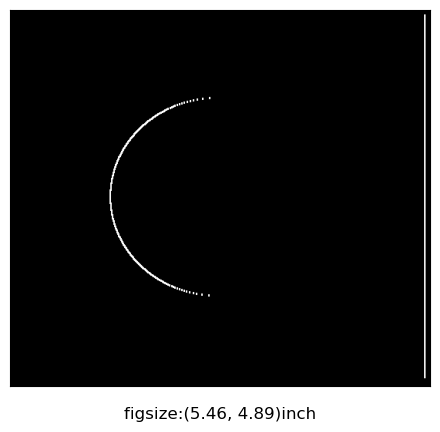

In [18]:
sobelx = cv2.Sobel(img, cv2.CV_64F, dx=1, dy=0, ksize=3)
cv_show('', sobelx)

# 将所有负值设置为0
sobelx_clipped = np.clip(sobelx, 0, None)
# 将结果转换为8位无符号整数
sobelx_uint8 = np.uint8(sobelx_clipped)
plt_show(sobelx_uint8)

白到黑是正数，黑到白就是负数了，所有的负数会被截断成0，所以要取绝对值

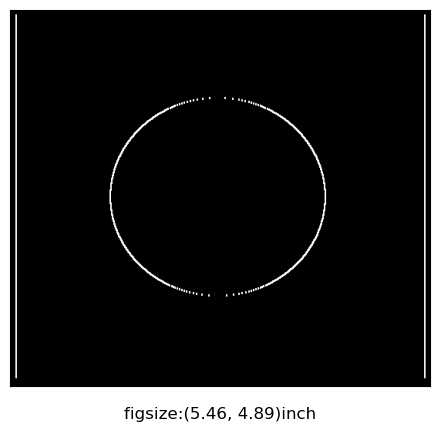

In [20]:
sobelx = cv2.Sobel(img, cv2.CV_64F, dx=1, dy=0, ksize=3)
# 将负数取绝对值
sobelx = cv2.convertScaleAbs(sobelx)
cv_show('', sobelx)
plt_show(sobelx)

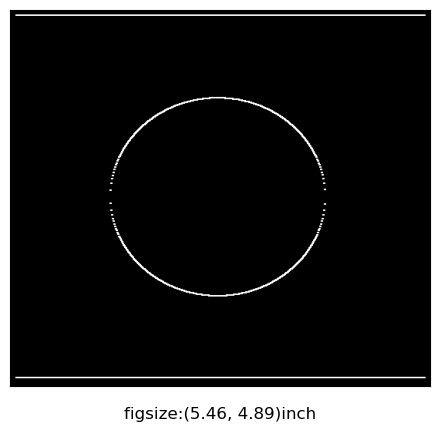

In [21]:
sobely = cv2.Sobel(img, cv2.CV_64F, dx=0, dy=1, ksize=3)
# 将负数取绝对值
sobely = cv2.convertScaleAbs(sobely)
cv_show('', sobely)
plt_show(sobely)

分别计算x和y，再求和（用cv2.addWeighted函数融合）

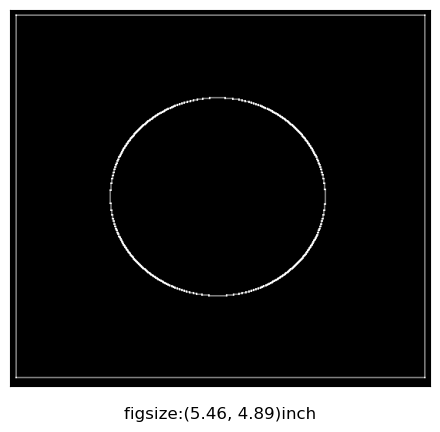

In [22]:
sobelxy = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
cv_show('', sobelxy)
plt_show(sobelxy)

注意：不建议直接计算

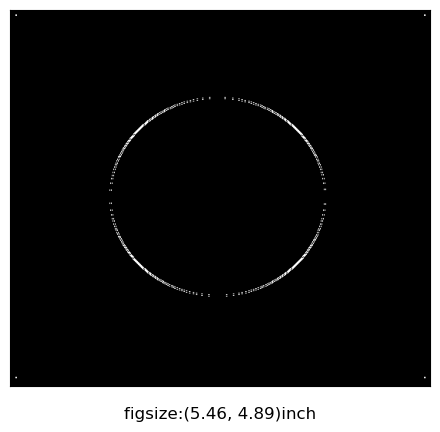

In [25]:
sobelxy = cv2.Sobel(img, cv2.CV_64F, dx=1, dy=1, ksize=3)
cv_show('', sobelxy)
# 将64位浮点数转化为8位无符号整数
sobelxy = cv2.convertScaleAbs(sobelxy)
plt_show(sobelxy)

##### 示例2：人像

分别计算x和y，再求和

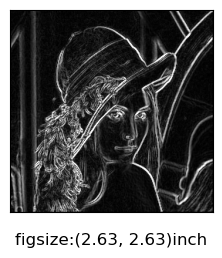

In [26]:
img = cv2.imread('assets/lena.jpg', cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(img, cv2.CV_64F, dx=1, dy=0, ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(img, cv2.CV_64F, dx=0, dy=1, ksize=3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
cv_show('', sobelxy)
plt_show(sobelxy)

直接计算（效果不好，不建议使用）

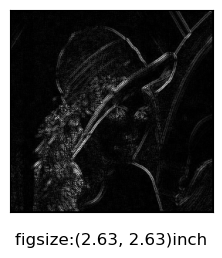

In [27]:
sobelxy = cv2.Sobel(img, cv2.CV_64F, dx=1, dy=1, ksize=3)
sobelxy = cv2.convertScaleAbs(sobelxy)
cv_show('', sobelxy)
plt_show(sobelxy)

### Scharr算子

Scharr算子是一种边缘检测算子，它是Sobel算子的一种改进版本。</br>Scharr算子通过对图像的每个像素点应用两个不同的方向（水平和垂直）的滤波器来检测边缘。</br>每个方向的滤波器都包含两个一阶导数，分别用于检测边缘的方向。

<img src='assets/scharr.png' />

Scharr算子与Sobel算子基本相同，主要区别在于两个核（卷积矩阵）中的数值不同

相比与Sobel算子，Scharr算子能检测到更多的细节

### laplacian算子

Laplacian算子是一种二阶微分算子，用于图像处理中的边缘检测。</br>它对图像中的每个像素点计算一个数值，这个数值代表了该像素点周围的灰度变化率。</br>Laplacian算子能够检测到图像中的边缘和角点，因为这些区域的灰度变化较为剧烈。

<img src='assets/laplacian.png' />

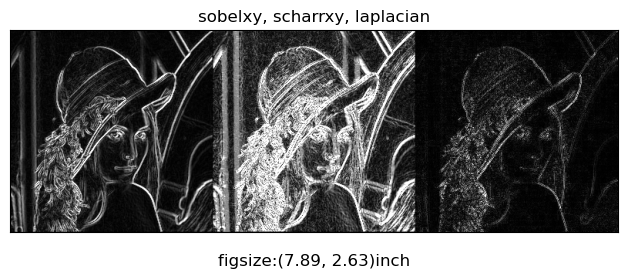

In [30]:
# 不同算子之间的差异
# sobel算子
img = cv2.imread('assets/lena.jpg', cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(img, cv2.CV_64F, dx=1, dy=0, ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(img, cv2.CV_64F, dx=0, dy=1, ksize=3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

# scharr算子
scharrx = cv2.Scharr(img, cv2.CV_64F, dx=1, dy=0)
scharrx = cv2.convertScaleAbs(scharrx)
scharry = cv2.Scharr(img, cv2.CV_64F, dx=0, dy=1)
scharry = cv2.convertScaleAbs(scharry)
scharrxy = cv2.addWeighted(scharrx, 0.5, scharry, 0.5, 0)

# laplacian算子
laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

res = np.hstack((sobelxy, scharrxy, laplacian))
cv_show('', res)
'''
三个算子的边缘检测效果中，sobel算子与scharr算子表现较好
相比于sobel算子，scharr算子能检测到更多的细节
而laplacian算子效果不太理想，一般不单独使用 
'''
plt_show(res, 'sobelxy, scharrxy, laplacian')